## Workspace Preperation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! pip install memory_profiler
%load_ext memory_profiler
#! pip install ipython -U
#! pip install ipython_genutils -U

  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-py3-none-any.whl size=30189 sha256=e7598451e6e1a6e384fb3637d65066e60470910e0222ef8410c466a40ab01290
  Stored in directory: /root/.cache/pip/wheels/56/19/d5/8cad06661aec65a04a0d6785b1a5ad035cb645b1772a4a0882
Successfully built memory-profiler


# Dataset Preperation

Loading Libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.8 MB/s 


In [6]:
import numpy as np
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import regex as re

Read the dataset

In [7]:
sar_acc = pd.read_json('/content/drive/Shareddrives/ECE 359 - Lex Labs/Sarcasm_Headlines_Dataset_v2.json',lines=True)
sar_acc['source'] = sar_acc['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])
sar_acc.head()

,is_sarcastic,headline,article_link,source
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,theonion
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,huffingtonpost
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,huffingtonpost
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,theonion
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,theonion


In [8]:
from wordcloud import STOPWORDS
import string
## Number of words in the text ##
sar_acc["num_words"] = sar_acc["headline"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
sar_acc["num_unique_words"] = sar_acc["headline"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
sar_acc["num_chars"] = sar_acc["headline"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
sar_acc["num_stopwords"] = sar_acc["headline"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
sar_acc["num_punctuations"] =sar_acc['headline'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
sar_acc["num_words_upper"] = sar_acc["headline"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
sar_acc["num_words_title"] = sar_acc["headline"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
sar_acc["mean_word_len"] = sar_acc["headline"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A v

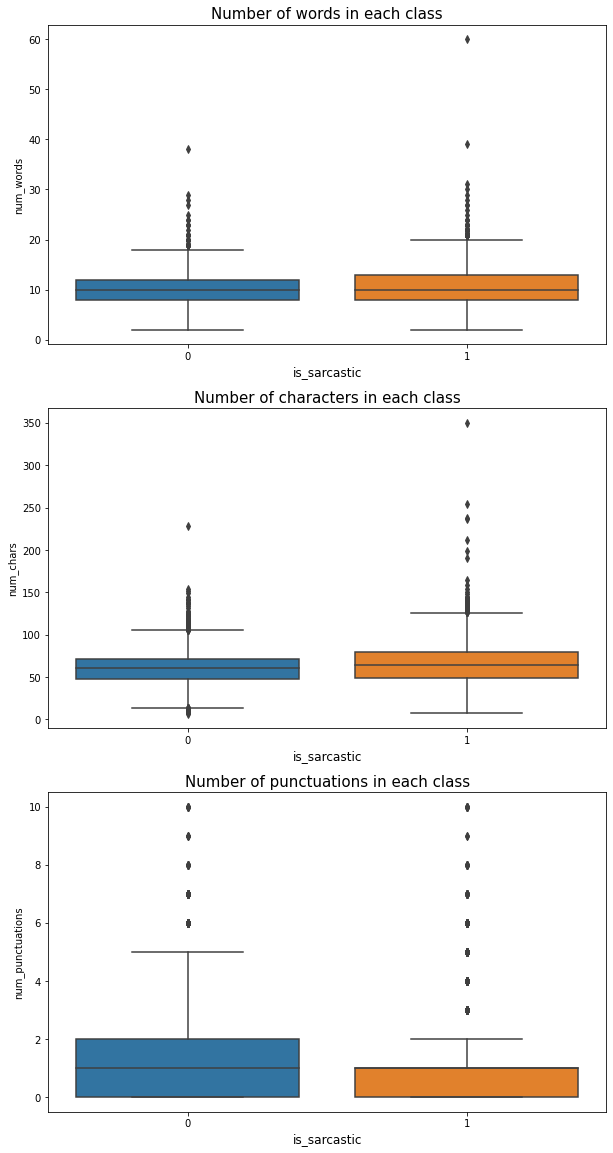

In [9]:
## Truncate some extreme values for better visuals ##
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

sar_acc['num_words'].loc[sar_acc['num_words']>60] = 60 #truncation for better visuals
sar_acc['num_punctuations'].loc[sar_acc['num_punctuations']>10] = 10 #truncation for better visuals
sar_acc['num_chars'].loc[sar_acc['num_chars']>350] = 350 #truncation for better visuals

sar_acc['num_words'].loc[sar_acc['num_words']>60] = 60 #truncation for better visuals
sar_acc['num_punctuations'].loc[sar_acc['num_punctuations']>10] = 10 #truncation for better visuals
sar_acc['num_chars'].loc[sar_acc['num_chars']>350] = 350 #truncation for better visuals

f, axes = plt.subplots(3, 1, figsize=(10,20))
sns.boxplot(x='is_sarcastic', y='num_words', data=sar_acc, ax=axes[0])
axes[0].set_xlabel('is_sarcastic', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.boxplot(x='is_sarcastic', y='num_chars', data=sar_acc, ax=axes[1])
axes[1].set_xlabel('is_sarcastic', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.boxplot(x='is_sarcastic', y='num_punctuations', data=sar_acc, ax=axes[2])
axes[2].set_xlabel('is_sarcastic', fontsize=12)
#plt.ylabel('Number of punctuations in text', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)
plt.show()


#Training Data Preperation

In [10]:
#Getting X and Y ready
from sklearn.preprocessing import LabelEncoder
X = sar_acc.headline
Y = sar_acc.is_sarcastic
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [11]:
# 2. Split into Training and Test data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [12]:
# 3. Processing the data for the model

# Tokenize the data and convert the text to sequences.
# Add padding to ensure that all the sequences have the same shape.
# There are many ways of taking the max_len and here an arbitrary length of 150 is chosen


from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

# RNN Development

In [14]:
# importing the functions from keras library 
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Model
from keras.callbacks import EarlyStopping

# defining the RNN function 
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
#     adding words to the layer of NN
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
#     adding LTSM to layer
    layer = LSTM(64)(layer)
#     adding dense layer
    layer = Dense(256,name='FC1')(layer)
#     adding the relu activation function
    layer = Activation('relu')(layer)
#     adding dropout pf 20%
    layer = Dropout(0.2)(layer)
#     adding the dense layer
    layer = Dense(1,name='out_layer')(layer)
#     adding sigmoid activation function
    layer = Activation('sigmoid')(layer)
#     initializing the model of RNN based on inputs and layers
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
# calling the model of RNN
model = RNN()
# generating the summary of the model formed
model.summary()
# compiling the model and assigning loss function and optimizer
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [19]:
from keras.callbacks import EarlyStopping
#Fitting the RNN
#model.fit(sequences_matrix,Y_train,batch_size=100,epochs=5, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

In [25]:
# creating test sequence from text
test_sequences = tok.texts_to_sequences(X_test)
# creating test sequence matrix using above created test sequence
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

## Feature Scaling

In [26]:
# min max scaling for features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# feature scaling on training matrix
print(scaler.fit(sequences_matrix))
scaler.transform(sequences_matrix)

MinMaxScaler(copy=True, feature_range=(0, 1))


array([[0.        , 0.        , 0.        , ..., 0.06806807, 0.01801802,
        0.1011011 ],
       [0.        , 0.        , 0.        , ..., 0.00900901, 0.003003  ,
        0.53953954],
       [0.        , 0.        , 0.        , ..., 0.001001  , 0.76876877,
        0.002002  ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.67467467],
       [0.        , 0.        , 0.        , ..., 0.        , 0.78278278,
        0.01501502],
       [0.        , 0.        , 0.        , ..., 0.09409409, 0.5015015 ,
        0.00600601]])

In [27]:
# min max scaling on testing matrix
print(scaler.fit(test_sequences_matrix))
scaler.transform(test_sequences_matrix)

MinMaxScaler(copy=True, feature_range=(0, 1))


array([[0.        , 0.        , 0.        , ..., 0.03507014, 0.02102102,
        0.01606426],
       [0.        , 0.        , 0.        , ..., 0.29659319, 0.002002  ,
        0.01907631],
       [0.        , 0.        , 0.        , ..., 0.1753507 , 0.03003003,
        0.23393574],
       ...,
       [0.        , 0.        , 0.        , ..., 0.18436874, 0.02202202,
        0.01706827],
       [0.        , 0.        , 0.        , ..., 0.00400802, 0.05605606,
        0.00502008],
       [0.        , 0.        , 0.        , ..., 0.00300601, 0.7997998 ,
        0.00100402]])

# Performance Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Training Data Accuracy
training_accr = model.evaluate(sequences_matrix,Y_train)
training_accr[1]

#Test Data Accuracy
accr = model.evaluate(test_sequences_matrix,Y_test)
accr[1]

179/179 [==============================] - 3s 18ms/step - loss: 0.4456 - accuracy: 0.8012


0.8011879920959473

In [ ]:
training_accr[1],accr[1]

(0.8163354396820068, 0.8011879920959473)

In [ ]:
#Saving Model Weights - Discontintued 
#model.weights

#Classification Matrix - Discontintued 
#print(classification_report(Y_test,Y_Pred))

#Confusion Matrix - Discontintued 
#confusion_matrix(Y_test,Y_Pred)

#Model Size  - Discontintued 
#from keras.models import load_model
#model.save('RNN_model.h5')

---
# Mini-Batch Variation
---

In [24]:
def get_training_accuracy(model,Minibatch_Array,Iterations):
  # calling the model of RNN
  # Initiate Training Data Storage
  Training_Accuracy_Matrix = np.zeros((Iterations,1))
  for i, each_minibatch in enumerate(Minibatch_Array):
    #Fit Model Using Minibatch
    print(each_minibatch)
    Training_Accuracy_Array = []
    for j in range(0,Iterations):
      #RNN Training Accuracy
      model = RNN()
      model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
      model.fit(sequences_matrix,Y_train,batch_size=each_minibatch,epochs=5, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
      Training_Accuracy = model.evaluate(sequences_matrix,Y_train)
      Training_Accuracy_Array = np.hstack((Training_Accuracy_Array,Training_Accuracy[1]))
    #Training Accuracy Matrix
    Training_Accuracy_Matrix = np.hstack((Training_Accuracy_Matrix,Training_Accuracy_Array.reshape(5,1)))
  #Average Training Accuracies
  Average_Training_Accuracy_Array = np.mean(np.delete(Training_Accuracy_Matrix,0,axis=1),0)
  return Average_Training_Accuracy_Array     

def get_prediction_accuracy(model,Minibatch_Array,Iterations):
  # Initiate Testing Data Storage
  Predicting_Accuracy_Matrix = np.zeros((Iterations,1))
  for i, each_minibatch in enumerate(Minibatch_Array):
    #Fit Model Using Minibatch
    print(each_minibatch)
    Predicting_Accuracy_Array = []
    for j in range(0,Iterations):
      #RNN Prediction Accuracy
      model = RNN()
      model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
      model.fit(sequences_matrix,Y_train,batch_size=each_minibatch,epochs=5, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
      Predicting_Accuracy = model.evaluate(test_sequences_matrix,Y_test)
      Predicting_Accuracy_Array = np.hstack((Predicting_Accuracy_Array,Predicting_Accuracy[1]))
    #Predicting Accuracy Matrix
    Predicting_Accuracy_Matrix = np.hstack((Predicting_Accuracy_Matrix,Predicting_Accuracy_Array.reshape(5,1)))
  # Average Predicting Accuracy 
  Average_Predicting_Accuracy_Array = np.mean(np.delete(Predicting_Accuracy_Matrix,0,axis=1),0)
  return Average_Predicting_Accuracy_Array  

def get_training_runtime(model,Minibatch_Array,Iterations):

  # Initiate Training Data Storage
  Average_Training_Runtime_Array = []

  for i, each_minibatch in enumerate(Minibatch_Array):
    print(each_minibatch)
    #RNN Training Runtime
    Runtime_Train = %timeit -o model.fit(sequences_matrix,Y_train,batch_size=Minibatch_Array[i],epochs=5, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
    Average_Training_Runtime_Array = np.hstack((Average_Training_Runtime_Array,np.mean(Runtime_Train.all_runs)))
  
  return Average_Training_Runtime_Array

def get_prediction_runtime(model,Minibatch_Array,Iterations):

  # Initiate Testing Data Storage
  Average_Prediction_Runtime_Array = []

  for i, each_minibatch in enumerate(Minibatch_Array):

    model.fit(sequences_matrix,Y_train,batch_size=each_minibatch,epochs=5, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
    print(each_minibatch)
    #RNN Prediction Runtime
    Runtime_Pred = %timeit -o np.round(model.predict(test_sequences_matrix))
    Average_Prediction_Runtime_Array = np.hstack((Average_Prediction_Runtime_Array,np.mean(Runtime_Pred.all_runs)))

  return Average_Prediction_Runtime_Array

def get_trainining_memory_usage(model,Minibatch_Array,Iterations):

  # Initiate Training Data Storage
  Training_Memory_Usage_Matrix = np.zeros((Iterations,1))

  for i, each_minibatch in enumerate(Minibatch_Array):
    Training_Memory_Usage_Array = []

    for j in range(0,Iterations):

      #RNN Training Memory Usage
      Memory_Usage_Train = %memit -o model.fit(sequences_matrix,Y_train,batch_size=Minibatch_Array[i],epochs=5, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
      Training_Memory_Usage_Array = np.hstack((Training_Memory_Usage_Array,Memory_Usage_Train.mem_usage[0]))

    Training_Memory_Usage_Matrix = np.hstack((Training_Memory_Usage_Matrix,Training_Memory_Usage_Array.reshape(5,1)))

  Average_Training_Memory_Usage_Array = np.mean(np.delete(Training_Memory_Usage_Matrix,0,axis=1),0)
  return Average_Training_Memory_Usage_Array
  return Average_Training_Memory_Usage_Array

def get_prediction_memory_usage(model,Minibatch_Array,Iterations):

  # Initiate Testing Data Storage
  Predicting_Memory_Usage_Matrix = np.zeros((Iterations,1))

  for i, each_minibatch in enumerate(Minibatch_Array):
    model.fit(sequences_matrix,Y_train,batch_size=each_minibatch,epochs=5, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
    Predicting_Memory_Usage_Array = []
    
    for j in range(0,Iterations):
      #RNN Prediction Memory Usage
      Memory_Usage_Pred = %memit -o np.round(model.predict(test_sequences_matrix))
      Predicting_Memory_Usage_Array = np.hstack((Predicting_Memory_Usage_Array,Memory_Usage_Pred.mem_usage[0]))

    Predicting_Memory_Usage_Matrix = np.hstack((Predicting_Memory_Usage_Matrix,Predicting_Memory_Usage_Array.reshape(5,1)))
  
  Average_Predicting_Memory_Usage_Array = np.mean(np.delete(Predicting_Memory_Usage_Matrix,0,axis=1),0)

  return Average_Predicting_Memory_Usage_Array

In [22]:
Minibatch_Array = [200,100,75,50,25]
Iterations = 5
Average_Training_Accuracy_Array = get_training_accuracy(RNN(),Minibatch_Array,Iterations)

200
Epoch 1/5
716/716 [==============================] - 14s 19ms/step - loss: 0.4276 - accuracy: 0.7972
Epoch 1/5
716/716 [==============================] - 14s 19ms/step - loss: 0.4243 - accuracy: 0.8019
Epoch 1/5
716/716 [==============================] - 14s 19ms/step - loss: 0.3942 - accuracy: 0.8234
Epoch 1/5
716/716 [==============================] - 14s 20ms/step - loss: 0.5049 - accuracy: 0.7568
Epoch 1/5
716/716 [==============================] - 14s 19ms/step - loss: 0.5091 - accuracy: 0.7690
100
Epoch 1/5
716/716 [==============================] - 14s 19ms/step - loss: 0.5252 - accuracy: 0.7319
Epoch 1/5
716/716 [==============================] - 14s 19ms/step - loss: 0.3738 - accuracy: 0.8318
Epoch 1/5
716/716 [==============================] - 14s 19ms/step - loss: 0.3814 - accuracy: 0.8273
Epoch 1/5
716/716 [==============================] - 14s 19ms/step - loss: 0.3723 - accuracy: 0.8340
Epoch 1/5
716/716 [==============================] - 15s 20ms/step - loss: 0.3983 -

In [23]:
print(Average_Training_Accuracy_Array)
#print(Average_Predicting_Memory_Usage_Array)

[0.78968334 0.80903254 0.83006769 0.75702118 0.82812841]


In [29]:
Average_Predicting_Accuracy_Array  = get_prediction_accuracy(RNN(),Minibatch_Array,Iterations)

200
Epoch 1/5
179/179 [==============================] - 4s 20ms/step - loss: 0.4227 - accuracy: 0.7994
Epoch 1/5
179/179 [==============================] - 3s 19ms/step - loss: 0.3899 - accuracy: 0.8258
Epoch 1/5
179/179 [==============================] - 3s 19ms/step - loss: 0.3987 - accuracy: 0.8218
Epoch 1/5
179/179 [==============================] - 3s 19ms/step - loss: 0.6489 - accuracy: 0.7124
Epoch 1/5
179/179 [==============================] - 3s 19ms/step - loss: 0.4052 - accuracy: 0.8204
100
Epoch 1/5
179/179 [==============================] - 4s 20ms/step - loss: 0.3982 - accuracy: 0.8222
Epoch 1/5
179/179 [==============================] - 3s 19ms/step - loss: 0.3972 - accuracy: 0.8199
Epoch 1/5
179/179 [==============================] - 3s 19ms/step - loss: 0.4095 - accuracy: 0.8178
Epoch 1/5
179/179 [==============================] - 3s 19ms/step - loss: 0.4137 - accuracy: 0.8118
Epoch 1/5
179/179 [==============================] - 3s 19ms/step - loss: 0.4067 - accuracy:

In [30]:
print(Average_Predicting_Accuracy_Array)

[0.79598184 0.81754018 0.82120895 0.81942698 0.81855345]


In [ ]:
Average_Training_Runtime_Array = get_training_runtime(model,Minibatch_Array,Iterations)

Epoch 1/5
92/92 [==============================] - 26s 284ms/step - loss: 0.2426 - accuracy: 0.8935 - val_loss: 0.3788 - val_accuracy: 0.8397
Epoch 1/5
92/92 [==============================] - 26s 281ms/step - loss: 0.2316 - accuracy: 0.8975 - val_loss: 0.3879 - val_accuracy: 0.8487
Epoch 1/5
92/92 [==============================] - 26s 282ms/step - loss: 0.2221 - accuracy: 0.9023 - val_loss: 0.4042 - val_accuracy: 0.8388
Epoch 1/5
92/92 [==============================] - 26s 281ms/step - loss: 0.2117 - accuracy: 0.9071 - val_loss: 0.4498 - val_accuracy: 0.8408
Epoch 1/5
92/92 [==============================] - 26s 283ms/step - loss: 0.2014 - accuracy: 0.9100 - val_loss: 0.4550 - val_accuracy: 0.8179
Epoch 1/5
92/92 [==============================] - 26s 281ms/step - loss: 0.1934 - accuracy: 0.9149 - val_loss: 0.4712 - val_accuracy: 0.8316
Epoch 1/5
92/92 [==============================] - 26s 282ms/step - loss: 0.1848 - accuracy: 0.9175 - val_loss: 0.4717 - val_accuracy: 0.8257
Epoch 

In [ ]:
print(Average_Training_Runtime_Array)

[26.01321525 26.19866325 29.44444249 36.60398799 60.59368118]


In [ ]:
Average_Prediction_Runtime_Array = get_prediction_runtime(model,Minibatch_Array,Iterations)

Epoch 1/5
104/104 [==============================] - 28s 271ms/step - loss: 0.1713 - accuracy: 0.9575 - val_loss: 1.0007 - val_accuracy: 0.7546
200
2.78 s ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Epoch 1/5
207/207 [==============================] - 28s 137ms/step - loss: 0.1297 - accuracy: 0.9601 - val_loss: 1.0117 - val_accuracy: 0.7895
100
2.87 s ± 61.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Epoch 1/5
275/275 [==============================] - 32s 116ms/step - loss: 0.1142 - accuracy: 0.9608 - val_loss: 0.9179 - val_accuracy: 0.7721
75
2.84 s ± 27.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Epoch 1/5
413/413 [==============================] - 40s 96ms/step - loss: 0.1041 - accuracy: 0.9624 - val_loss: 1.0219 - val_accuracy: 0.7974
50
2.82 s ± 37.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Epoch 1/5
825/825 [==============================] - 66s 80ms/step - loss: 0.1050 - accuracy: 0.9607 - val_loss: 1.1603 - val_accuracy: 0.7

In [ ]:
print(Average_Prediction_Runtime_Array)

[2.78476456 2.8718202  2.83948473 2.81994428 2.80046669]


In [ ]:
Average_Training_Memory_Usage_Array = get_testing_memory_usage(model,Minibatch_Array,Iterations)

Epoch 1/5
104/104 [==============================] - 28s 269ms/step - loss: 0.0760 - accuracy: 0.9719 - val_loss: 1.0954 - val_accuracy: 0.7878
peak memory: 863.01 MiB, increment: 0.38 MiB
peak memory: 863.01 MiB, increment: 0.00 MiB
peak memory: 863.01 MiB, increment: 0.00 MiB
peak memory: 863.01 MiB, increment: 0.00 MiB
peak memory: 863.01 MiB, increment: 0.00 MiB
Epoch 1/5
207/207 [==============================] - 28s 137ms/step - loss: 0.0704 - accuracy: 0.9722 - val_loss: 1.2233 - val_accuracy: 0.7965
peak memory: 863.05 MiB, increment: 0.00 MiB
peak memory: 863.05 MiB, increment: 0.00 MiB
peak memory: 863.05 MiB, increment: 0.00 MiB
peak memory: 863.05 MiB, increment: 0.00 MiB
peak memory: 863.05 MiB, increment: 0.00 MiB
Epoch 1/5
275/275 [==============================] - 32s 116ms/step - loss: 0.0657 - accuracy: 0.9727 - val_loss: 1.2955 - val_accuracy: 0.7878
peak memory: 863.04 MiB, increment: 0.00 MiB
peak memory: 863.04 MiB, increment: 0.00 MiB
peak memory: 863.04 MiB, inc

In [ ]:
print(Average_Training_Memory_Usage_Array)

[863.01171875 863.05078125 863.04765625 863.0859375  863.11328125]


In [ ]:
Average_Predicting_Memory_Usage_Array = get_prediction_memory_usage(model,Minibatch_Array,Iterations)

Epoch 1/5
104/104 [==============================] - 28s 267ms/step - loss: 0.0496 - accuracy: 0.9785 - val_loss: 1.5542 - val_accuracy: 0.7703
peak memory: 863.11 MiB, increment: 0.00 MiB
peak memory: 863.11 MiB, increment: 0.00 MiB
peak memory: 863.11 MiB, increment: 0.00 MiB
peak memory: 863.11 MiB, increment: 0.00 MiB
peak memory: 863.11 MiB, increment: 0.00 MiB
Epoch 1/5
207/207 [==============================] - 28s 136ms/step - loss: 0.0469 - accuracy: 0.9801 - val_loss: 1.7786 - val_accuracy: 0.7821
peak memory: 863.10 MiB, increment: 0.00 MiB
peak memory: 863.10 MiB, increment: 0.00 MiB
peak memory: 863.10 MiB, increment: 0.00 MiB
peak memory: 863.10 MiB, increment: 0.00 MiB
peak memory: 863.10 MiB, increment: 0.00 MiB
Epoch 1/5
275/275 [==============================] - 32s 116ms/step - loss: 0.0462 - accuracy: 0.9796 - val_loss: 1.7009 - val_accuracy: 0.7764
peak memory: 863.09 MiB, increment: 0.00 MiB
peak memory: 863.09 MiB, increment: 0.00 MiB
peak memory: 863.09 MiB, inc

In [ ]:
print(Average_Predicting_Memory_Usage_Array)

[863.10546875 863.09765625 863.08984375 863.11328125 863.10546875]
